# MNIST

x(R784) --> f --> y(R10)

Layer 1: 4 layers

Layer 2: 2 layers

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
X = x_train[87]
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
X.shape

(28, 28)

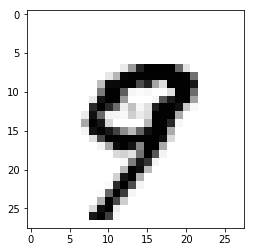

In [8]:
plt.imshow(X, cmap = 'Greys')

In [9]:
y_train[87]

9

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [13]:
from keras.utils import np_utils

In [14]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [15]:
y_train[87]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.], dtype=float32)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [17]:
model = Sequential()

In [18]:
model.add(Dense(4, input_dim = 784))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [20]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [21]:
model.compile(loss='mse', optimizer=SGD(lr = 0.087), metrics=['accuracy']) #loss function, optimizer(設定learning rate), 看在執行時需要什麼結果

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [23]:
784*4+4

3140

In [24]:
4*2+2

10

In [25]:
2*10+10

30

In [ ]:
model.fit(x_train, y_train, batch_size = 100, epochs = 20)#每次訓練大小，訓練幾次(60000筆看20次)

In [27]:
from ipywidgets import interact_manual

In [28]:
predict = model.predict_classes(x_test)

In [29]:
predict

array([7, 2, 1, ..., 7, 7, 6], dtype=int64)

In [30]:
def test(number):
    plt.imshow(x_test[number].reshape(28,28), cmap='Greys')
    print('Decide that is', predict[number])

Decide that is 1


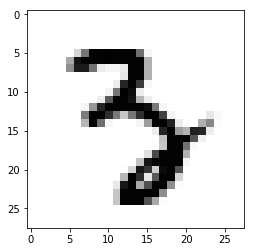

In [31]:
test(87)

In [32]:
interact_manual(test, number=(0, 9999))

interactive(children=(IntSlider(value=4999, description='number', max=9999), Button(description='Run Interact'…

<function __main__.test(number)>

In [33]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 47us/step


In [34]:
print('loss:', score[0])
print('正確率', score[1])

loss: 0.08671068302392959
正確率 0.3514


In [35]:
model_json = model.to_json()
open('stupid_model.json', 'w').write(model_json)
model.save_weights('stupid_model_weights.h5')